# Machine Learning Project

 1) data curation: how you choose the features (X) and the target (Y)
 2) exploratory data analysis (including visualization and correlation matrix)
 3) univariate results (and meta analysis)
 4) multivariate results (and meta analysis)
 5) benchmark linear/logistic regressions (including higher-order polynomials and/or interaction terms)
 6) one machine learning algorithm (e.g., random forests or boosting)
 7) k-fold cross-validation 
 8) performance evaluation (R-squared, AUROC, etc.)
 9) key features (dimension reduction and feature selection techniques if necessary)
 10) synthetic interpretation of results

## Introduction

For my Project I choose a **Airplane Engine Dataset** which has **27** columns and **20631** entries for the train dataset The test dataset contains **11939** entries. 
The dataset contains the following columns:
- id: Engine ID, 
- cycle: Cycle number,
- setting1-3: Engine setting 1-3,
- s1-s21: Sensor measurements s1-s21,
- Y: Binary target label indicating engine swap (1: needs swapping, 0: does not need swapping).

## Project

### 0) Importing Libaries

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from prompt_toolkit.key_binding.bindings.named_commands import yank_last_arg
from sklearn.linear_model import LinearRegression

### 1) Data Curration


#### 1) Load and edit the Dataset

In [2]:
# Load the dataset
dataset_train = pd.read_csv("PM_train.csv")
dataset_test = pd.read_csv("PM_test.csv")

# Shift the cycle column forward by 1 to identify the last cycle before it resets
dataset_train['Y'] = (dataset_train['cycle'] == dataset_train.groupby('id')['cycle'].transform('max')).astype(int)
dataset_test['Y'] = (dataset_test['cycle'] == dataset_test.groupby('id')['cycle'].transform('max')).astype(int)

# Define selected columns, including 'Y'
selected_columns = ['id', 'cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'Y']

# Select the subset of data
selected_dataset_train = dataset_train[selected_columns]
selected_dataset_test = dataset_test[selected_columns]

## Save the selected dataset to an Excel file
# selected_dataset.to_excel("selected_dataset_with_Y.xlsx", index=False)

# Sort by 'id' and 'cycle' to ensure the data is in the correct order
dataset_train = dataset_train.sort_values(['id', 'cycle'])
dataset_test = dataset_test.sort_values(['id', 'cycle'])

# Group by 'id' and select the last 10 cycles for each 'id'
last_10_cycles_train = dataset_train.groupby('id').tail(10)
last_10_cycles_test = dataset_test.groupby('id').tail(10)

# Further filter the selected columns for this subset
selected_last_10_cycles_train = last_10_cycles_train[selected_columns]
selected_last_10_cycles_test = last_10_cycles_test[selected_columns]

# Display the result
selected_last_10_cycles_train.head()
selected_last_10_cycles_test.head()

# Define the features (X) and target (Y)
X_train = selected_dataset_train # .drop(columns=['Y', 'id', 'cycle'])  # Drop 'Y', 'id', and 'cycle' if they are not part of the model
Y_train = selected_dataset_train['Y']
X_test = selected_dataset_test #.drop(columns=['Y', 'id', 'cycle'])  # Drop 'Y', 'id', and 'cycle' if they are not part of the model
Y_test = selected_dataset_test['Y']

# Alternatively, if using only the last 10 cycles:
X_last_10_train = selected_last_10_cycles_train.drop(columns=['Y', 'id', 'cycle'])
Y_last_10_train = selected_last_10_cycles_train['Y']
X_last_10_test = selected_last_10_cycles_test.drop(columns=['Y', 'id', 'cycle'])
Y_last_10_test = selected_last_10_cycles_test['Y']


After visualizing the dataset, I decided to use the following columns as features:
- id: Engine ID,
- cycle: Cycle number,
- setting1: Engine setting 1,
- setting2: Engine setting 2,
- s2: Sensor measurement 2,
- s3: Sensor measurement 3,
- s4: Sensor measurement 4,
- s6: Sensor measurement 6,
- s7: Sensor measurement 7,
- s8: Sensor measurement 8,
- s9: Sensor measurement 9,
- s11: Sensor measurement 11,
- s12: Sensor measurement 12,
- s13: Sensor measurement 13,
- s14: Sensor measurement 14,
- s15: Sensor measurement 15,
- s17: Sensor measurement 17,
- s20: Sensor measurement 20,
- s21: Sensor measurement 21,
- Y: Binary target label indicating engine swap (1: needs swapping, 0: does not need swapping). Which I created on my own by using the last value before the id goes up by one.   

The reason for this is that these values are the most relevant for the prediction of the target label 'Y' because the other columns are null values and don't change.


### 2) Data Analysis

#### 2.1) Visualization of the whole Dataset

In [3]:
# Visualization
selected_dataset_train.head()
selected_dataset_train.info()
# 
# for column in selected_dataset_train.columns:
#     if column not in ['id', 'Y']:  # Skip 'id' and 'Y' for this general visualization
#         plt.figure(figsize=(10, 5))
#         plt.title(f"Distribution of {column}")
#         plt.plot(selected_dataset_train['cycle'], selected_dataset_train[column], alpha=0.7)
#         plt.xlabel("Cycle")
#         plt.ylabel(column)
#         plt.grid(True, alpha=0.5)
#         plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   s2        20631 non-null  float64
 5   s3        20631 non-null  float64
 6   s4        20631 non-null  float64
 7   s6        20631 non-null  float64
 8   s7        20631 non-null  float64
 9   s8        20631 non-null  float64
 10  s9        20631 non-null  float64
 11  s11       20631 non-null  float64
 12  s12       20631 non-null  float64
 13  s13       20631 non-null  float64
 14  s14       20631 non-null  float64
 15  s15       20631 non-null  float64
 16  s17       20631 non-null  int64  
 17  s20       20631 non-null  float64
 18  s21       20631 non-null  float64
 19  Y         20631 non-null  int64  
dtypes: float64(16), int64(4)
mem

I this part I visualized the whole dataset and the distribution of the columns in the dataset. To get a rough view about the dataset.

#### 2.2) Visualization of the last 10 cycles

In [4]:
# selected_last_10_cycles_train.head()
# selected_last_10_cycles_train.info()
# 
# for column in selected_last_10_cycles_train.columns:
#     if column not in ['id', 'Y']:  # Skip 'id' and 'Y' for this general visualization
#         plt.figure(figsize=(10, 5))
#         plt.title(f"Distribution of {column}")
#         plt.plot(selected_last_10_cycles_train['cycle'], selected_last_10_cycles_train[column], alpha=0.7)
#         plt.xlabel("Cycle")
#         plt.ylabel(column)
#         plt.grid(True, alpha=0.5)
#         plt.show()

I this part I visualized the last 10 cycles of the dataset and the distribution of the columns in the dataset. To get a more narrow insight about the dataset.

### 3) Univarite Multivatriate Analysis

#### 3.0) Boxplot and first look

count         mean           std        min        25%        50%  \
id        20631.0    51.506568  2.922763e+01     1.0000    26.0000    52.0000   
cycle     20631.0   108.807862  6.888099e+01     1.0000    52.0000   104.0000   
setting1  20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015     0.0000   
setting2  20631.0     0.000002  2.930621e-04    -0.0006    -0.0002     0.0000   
setting3  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s1        20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s2        20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s3        20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s4        20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s5        20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s6        20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s7        20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s8        20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s9        20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s10       20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s11       20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s12       20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s13       20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s14       20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s15       20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s16       20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s17       20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s18       20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s19       20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s20       20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s21       20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   
Y         20631.0     0.004847  6.945369e-02     0.0000     0.0000     0.0000   

                75%        max  
id          77.0000   100.0000  
cycle      156.0000   362.0000  
setting1     0.0015     0.0087  
setting2     0.0003     0.0006  
setting3   100.0000   100.0000  
s1         518.6700   518.6700  
s2         643.0000   644.5300  
s3        1594.3800  1616.9100  
s4        1414.5550  1441.4900  
s5          14.6200    14.6200  
s6          21.6100    21.6100  
s7         554.0100   556.0600  
s8        2388.1400  2388.5600  
s9        9069.4200  9244.5900  
s10          1.3000     1.3000  
s11         47.7000    48.5300  
s12        521.9500   523.3800  
s13       2388.1400  2388.5600  
s14       8148.3100  8293.7200  
s15          8.4656     8.5848  
s16          0.0300     0.0300  
s17        394.0000   400.0000  
s18       2388.0000  2388.0000  
s19        100.0000   100.0000  
s20         38.9500    39.4300  
s21         23.3668    23.6184  
Y            0.0000     1.0000

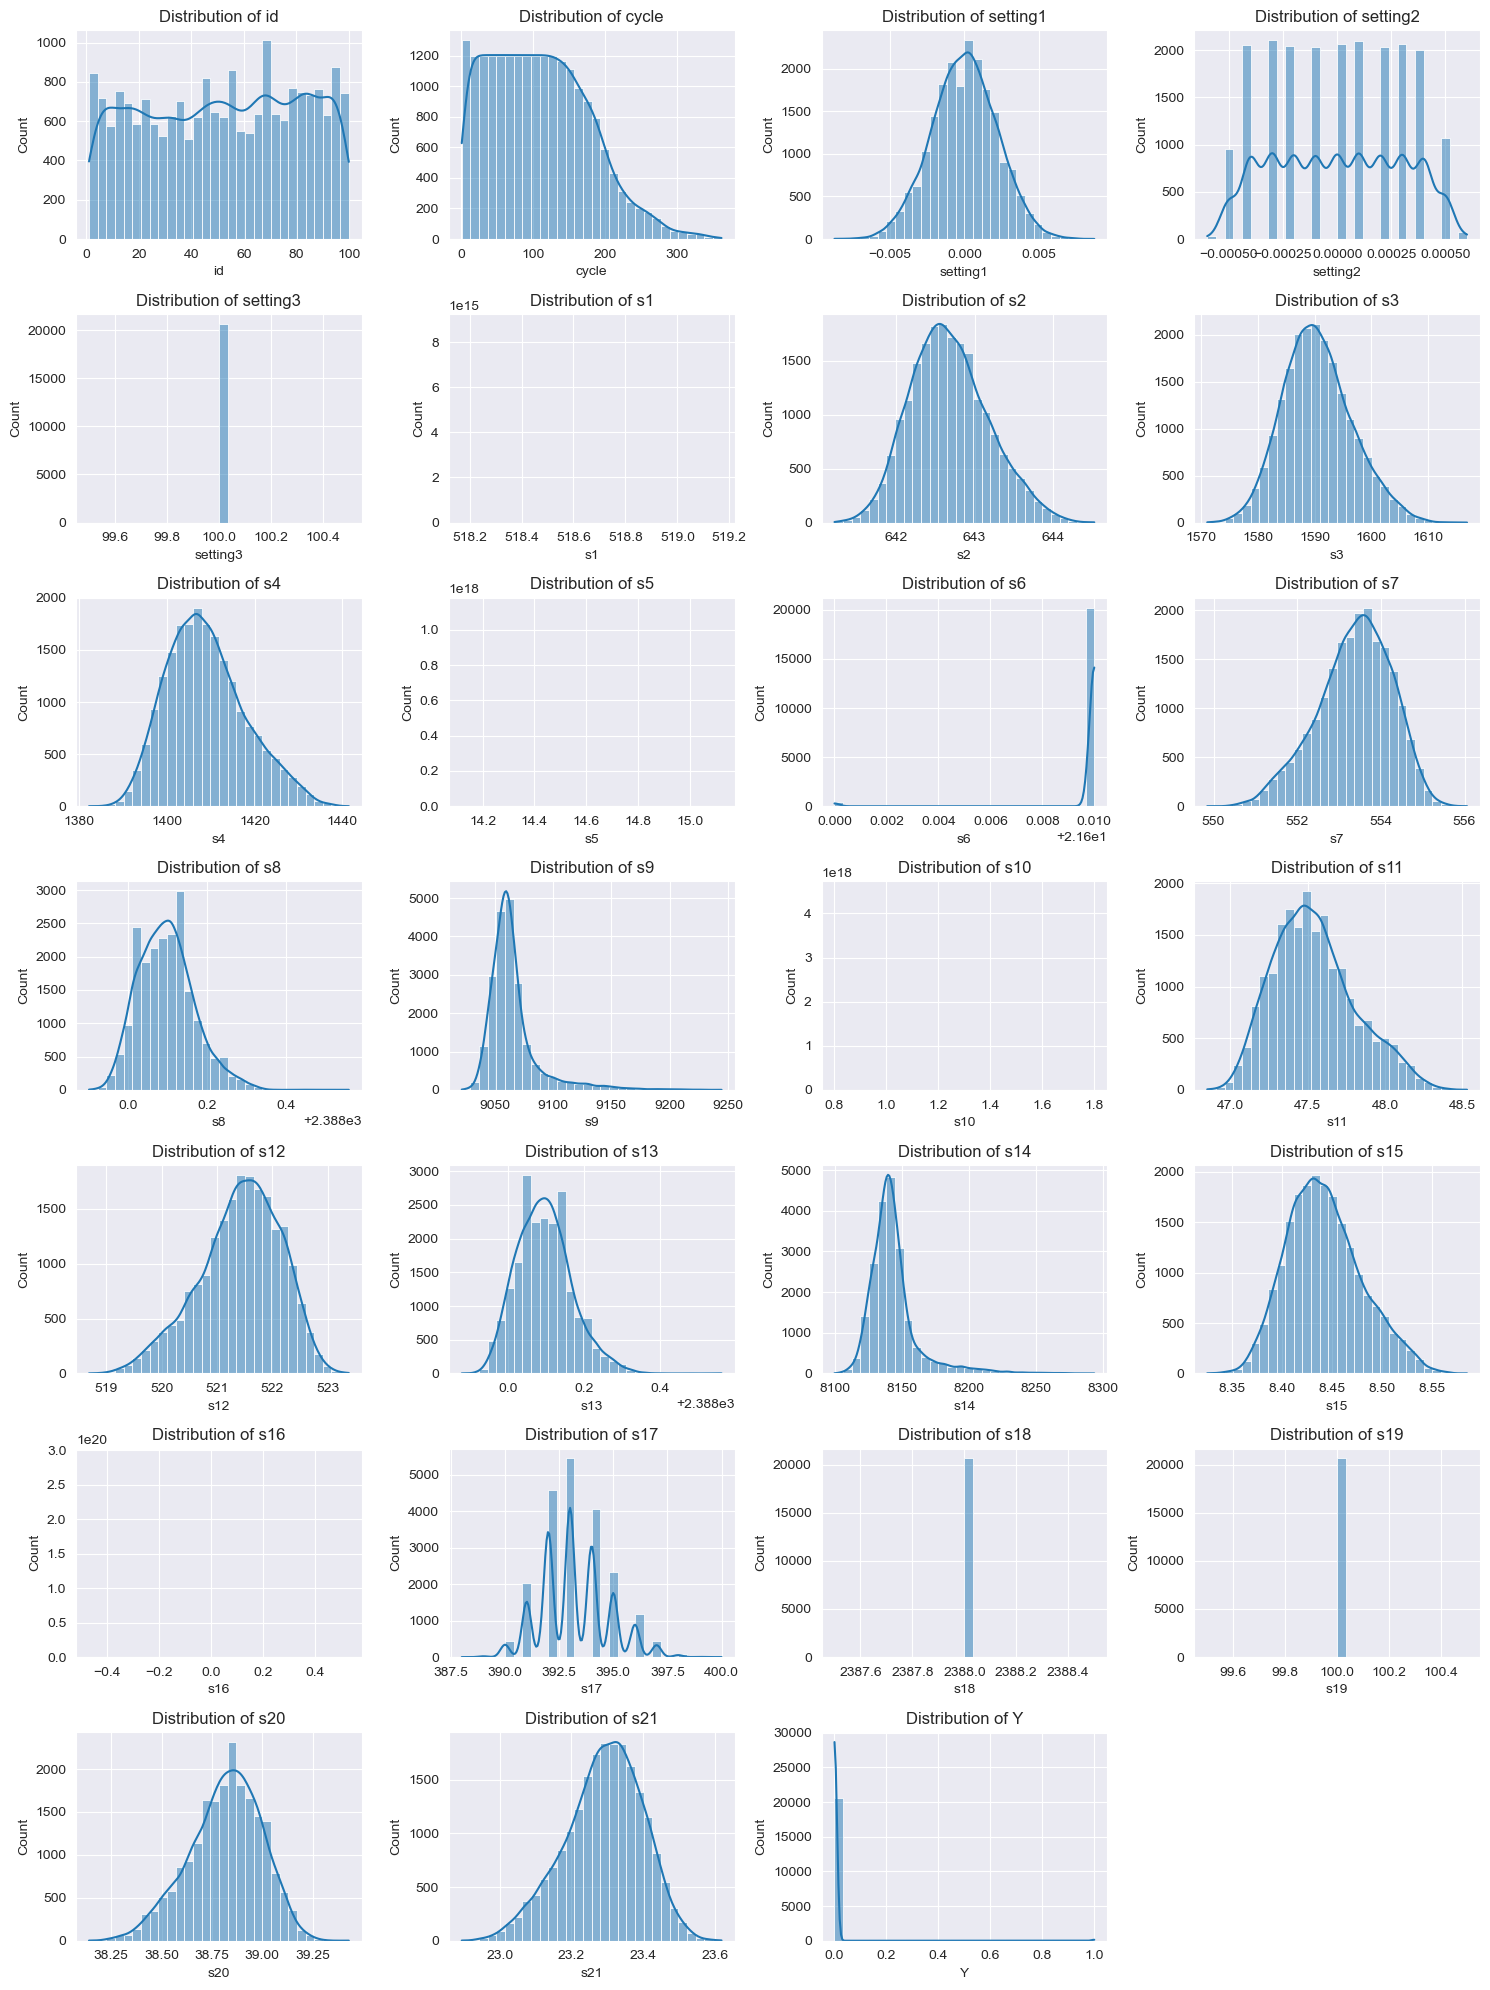

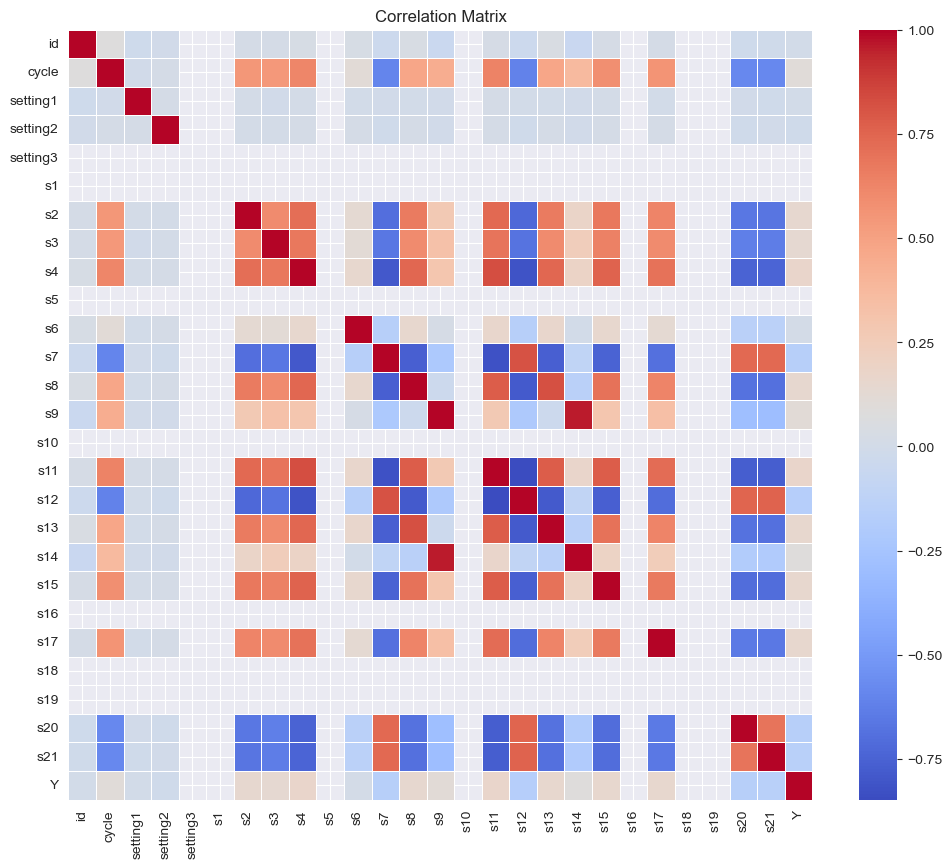

In [5]:
# Step 1: Univariate Analysis
# Generate summary statistics for all numeric columns
numeric_columns = dataset_train.select_dtypes(include=[float, int]).columns
univariate_stats = dataset_train[numeric_columns].describe().transpose()

from IPython.display import display
display(univariate_stats)

# Visualize the distribution of numeric features with histograms
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) // 4) + 1, 4, i)
    sns.histplot(dataset_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Step 2: Multivariate Analysis
# Generate correlation matrix
correlation_matrix = dataset_train[numeric_columns].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# Boxplot of every column

columns = selected_dataset_train.columns
num_cols = len(columns)

# fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 3 * num_cols))
# fig.tight_layout(pad=3.0)

# # Plot each column in its own subplot
# for i, col in enumerate(selected_last_10_cycles_train):
#     ax = axes[i] if num_cols > 1 else axes
#     sns.boxplot(y=selected_dataset_train[col], ax=ax)
#     ax.set_title(f'Boxplot of {col}')
#     ax.set_ylabel("")

plt.show()


#### 3.1) Scatter Plot Matrix whole Dataset

/opt/miniconda3/envs/Project/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


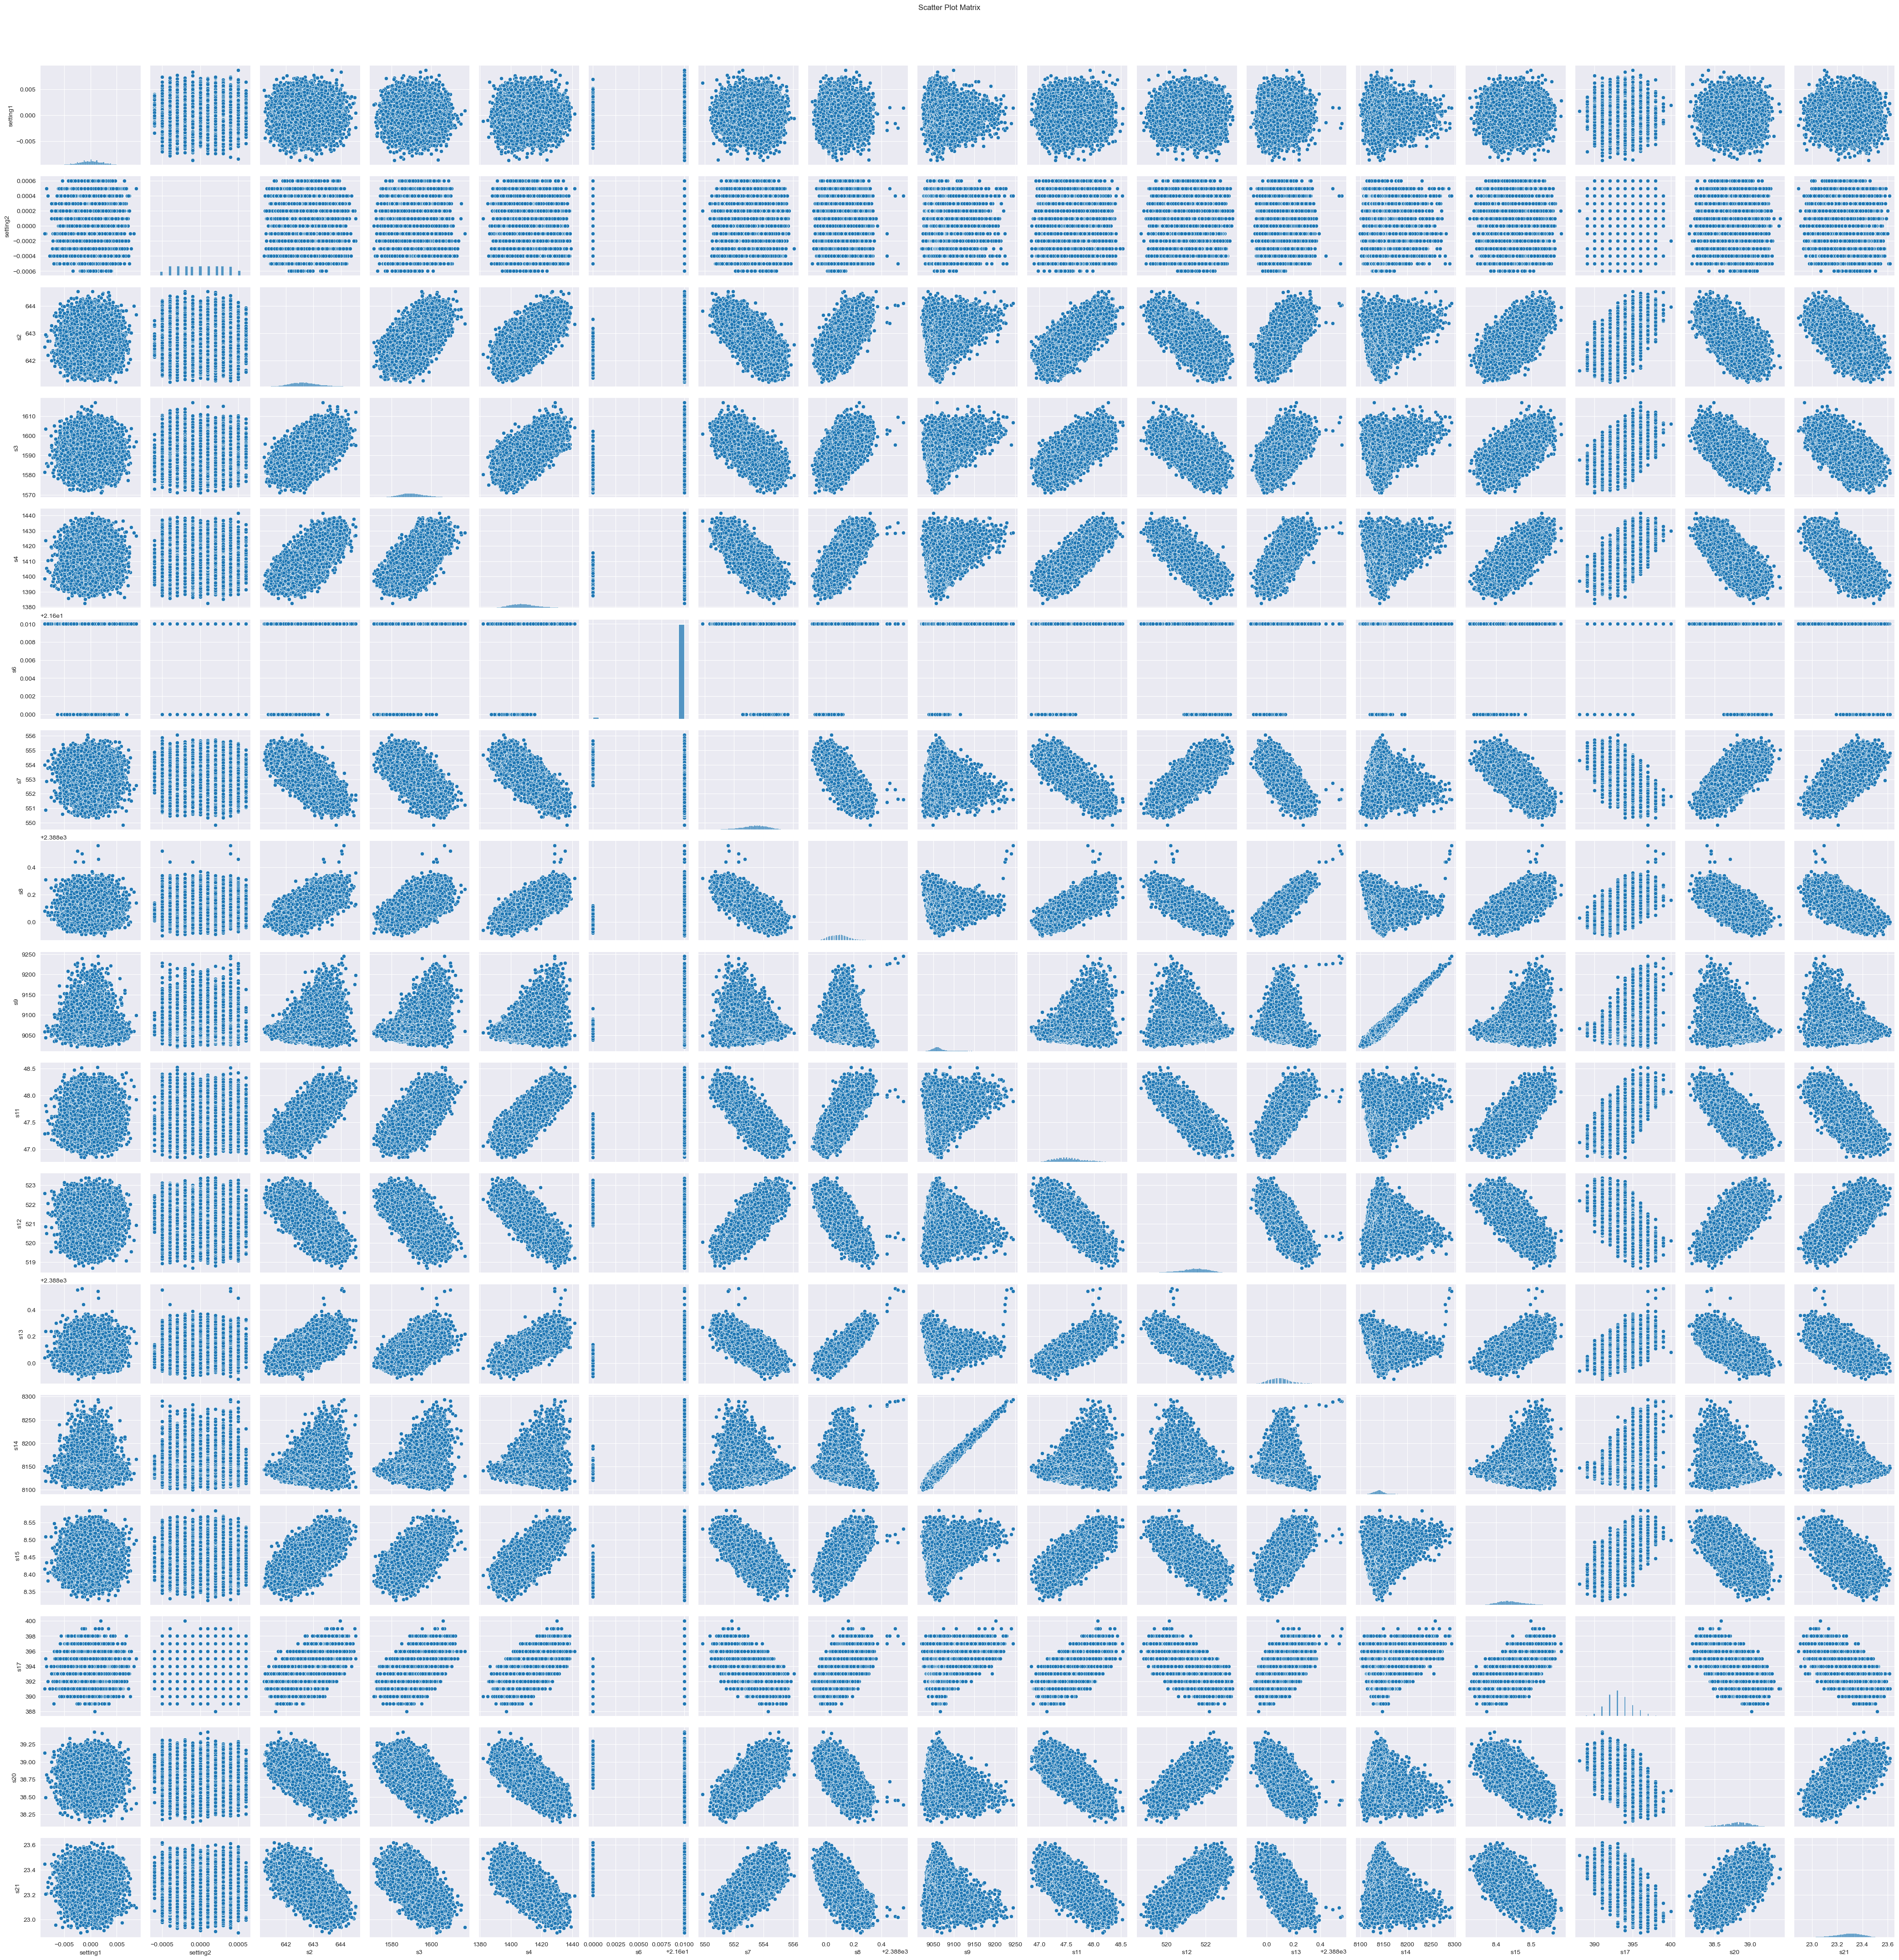

In [6]:

# # Heatmap
# plt.figure(figsize=(12, 10))
# correlation_matrix = X_train.corr()  # Compute the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix Heatmap (Last 10 Cycles)')
# plt.show()
#
# Scatter plot matrix
numeric_columns = [col for col in selected_columns if col not in ['id', 'Y', 'cycle']]
sns.pairplot(X_train, vars=numeric_columns[:20])  # Limit to first 6 for clarity
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

# # 3D Scatter Plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(
#     selected_last_10_cycles_train['setting1'],
#     selected_last_10_cycles_train['s2'],
#     selected_last_10_cycles_train['s3'],
#     c='b', marker='o'
# )

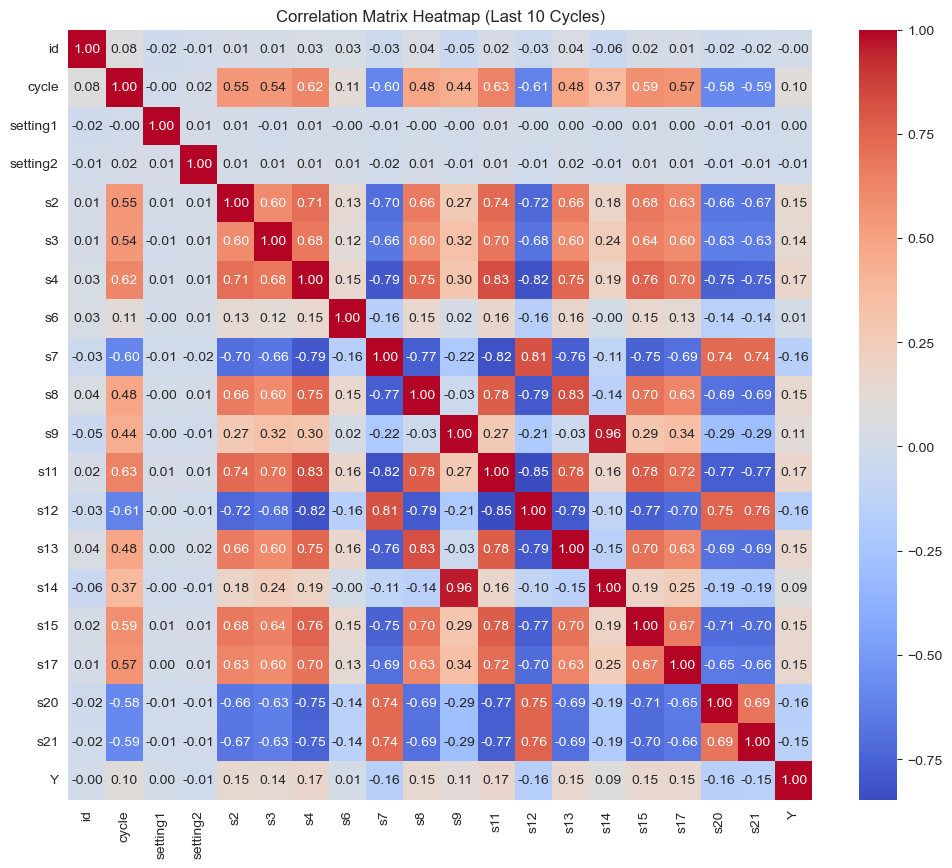

In [ ]:

# Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Last 10 Cycles)')
plt.show()

# Scatter plot matrix
numeric_columns = [col for col in selected_columns if col not in ['id', 'Y', 'cycle']]
sns.pairplot(X_train, vars=numeric_columns[:20])  # Limit to first 6 for clarity
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

# # 3D Scatter Plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(
#     selected_last_10_cycles_train['setting1'],
#     selected_last_10_cycles_train['s2'],
#     selected_last_10_cycles_train['s3'],
#     c='b', marker='o'
# )

# # Label the axes
# ax.set_xlabel('Cycle')
# ax.set_ylabel('S9')
# ax.set_zlabel('S14')
# plt.title('3D Scatter Plot')
# plt.show()

#### 3.2) Scatter Plot Matrix last 10 cycles

In [ ]:
# Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = selected_last_10_cycles_train.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Last 10 Cycles)')
plt.show()

# Scatter plot matrix
numeric_columns = [col for col in selected_columns if col not in ['id', 'Y', 'cycle']]
sns.pairplot(selected_last_10_cycles_train, vars=numeric_columns[:20])  # Limit to first 6 for clarity
plt.suptitle('Scatter Plot Matrix (Last 10 Cycles)', y=1.02)
plt.show()

# # 3D Scatter Plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(
#     selected_last_10_cycles_train['setting1'],
#     selected_last_10_cycles_train['s2'],
#     selected_last_10_cycles_train['s3'],
#     c='b', marker='o'
# )

# # Label the axes
# ax.set_xlabel('Setting 1')
# ax.set_ylabel('S2')
# ax.set_zlabel('S3')
# plt.title('3D Scatter Plot (Last 10 Cycles)')
# plt.show()

#### 3.3) My analysis

1. In the scatter plot matrix of the whole dataset, I could identify that S9 and S14 are highly correlated with each other. My opinion is that it may be both the same sensor and is there for redundancy.
2. S4 and S3 also have a high variation which could also be an indicator for a engine swap.
3. Approaches I could do as well would be clustering on sensor readings or bootstrapping to maximize the predictive power.
4. There could be maybe possibilities to improve the model with thresholding the data and amplify or summing the data.

In [ ]:
# Scatter Plot S9 and S14
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='s9', y='s14', alpha=0.7)
sns.regplot(data=X_train, x='s9', y='s14', scatter=False, color='yellow')
plt.xlabel('S9')
plt.ylabel('S14')
plt.title('Scatter Plot of S9 and S14')
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='s8', y='s13', alpha=0.7)
sns.regplot(data=X_train, x='s8', y='s13', scatter=False, color='yellow')
plt.xlabel('S8')
plt.ylabel('S13')
plt.title('Scatter Plot of S8 and S13')
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='s13', y='s14', alpha=0.7)
sns.regplot(data=X_train, x='s13', y='s14', scatter=False, color='yellow')
plt.xlabel('S8')
plt.ylabel('S13')
plt.title('Scatter Plot of S8 and S13')
plt.grid(True, alpha=0.5)
plt.show()

#### 3.4) Possible Feauture Engineering

1. A possible feature engineering could be to add a threshold for S9 and S14 to amplify the data.
2. Another possible feature engineering could be to add a new column which is the combination of S9 and S14
3. Another possible approach could be to work with S3 and S4 because they're after S9 and S14 the columns with a high difference.


### 4) Benchmark Regression

#### 4.0) Linear Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, r2_score
# 
# train_data = dataset_train.copy()
# features = train_data.columns.difference(['id', 'cycle', 'RUL', 'Y'])
# # Step 1: Create target labels indicating engine swap (1: needs swapping, 0: does not need swapping)
# threshold = 10  # Define the threshold for remaining cycles
# train_data['RUL'] = train_data.groupby('id')['cycle'].transform(max) - train_data['cycle']
# train_data['Y'] = (train_data['RUL'] <= threshold).astype(int)
# 
# 
# # Logistic Regression
# logreg = LogisticRegression()
# 
# X = train_data[features]
# y = train_data['Y']
# logreg.fit(X, y)
# 
# y_pred = logreg.predict(X_test)
# 
# # y_test contains the true labels and y_pred contains the predicted labels
# y_test_binary = (y_test <= threshold).astype(int)
# y_pred_binary = (y_pred <= threshold).astype(int)
# 
# # Evaluate the model
# accuracy = accuracy_score(y_test_binary, y_pred_binary)
# print(f'Accuracy: {accuracy}')
# print(classification_report(y_test_binary, y_pred_binary))


#### 4.1) Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score, f1_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
train_data = dataset_train.copy()
test_data = dataset_test.copy()


# Step 2: Create RUL and Target Variable
train_data['RUL'] = train_data.groupby('id')['cycle'].transform(max) - train_data['cycle']
test_data['RUL'] = test_data.groupby('id')['cycle'].transform(max) - test_data['cycle']

# Define binary target (e.g., RUL <= 10 means maintenance required)
threshold = 10
train_data['Y'] = (train_data['RUL'] <= threshold).astype(int)
test_data['Y'] = (test_data['RUL'] <= threshold).astype(int)

# Step 3: Select Features
features = [col for col in train_data.columns if col not in ['id', 'cycle', 'RUL', 'Y']]
X_train = train_data[features]
y_train = train_data['Y']
X_test = test_data[features]
y_test = test_data['Y']

# Step 4: Preprocess Features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Step 7: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUROC:", roc_auc_score(y_test, y_pred_prob))

# Step 8: Feature Coefficients (Optional for Insight)
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Top Features:\n", coefficients.head(10))

print("R² Score:", r2_score(y_test, y_pred_prob))
# print("f1 Score:", f1_score(y_test, y_pred_prob))

### 5) Machine Learning Model

#### 5.0) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

train_data = dataset_train.copy()

# Step 1: Create target labels indicating engine swap (1: needs swapping, 0: does not need swapping)
threshold = 11  # Define the threshold for remaining cycles
train_data['RUL'] = train_data.groupby('id')['cycle'].transform(max) - train_data['cycle']
train_data['Y'] = (train_data['RUL'] <= threshold).astype(int)

# Step 2: Define features (X) and target (Y)
features = train_data.columns.difference(['id', 'cycle', 'RUL', 'Y'])
X = train_data[features]
y = train_data['Y']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Random Forest Classifier with Cross-Validation
rf = RandomForestClassifier(random_state=42, n_estimators=100)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')

# Fit the model
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]


##### 5.1) Random Forest Evaluation

In [ ]:
from sklearn.metrics import r2_score

# Performance Metrics
classification_report_result = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("Classification Report:\n", classification_report_result)
print("ROC-AUC Score:", roc_auc)
print("Mean Cross-Validation AUC:", cv_scores.mean())

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Extract TP, FP, FN, TN from the confusion matrix
TN_nn, FP_nn, FN_nn, TP_nn = conf_matrix_rf.ravel()

# Print the TP/FP breakdown
print(f"True Positives (TP): {TP_nn}")
print(f"False Positives (FP): {FP_nn}")
print(f"True Negatives (TN): {TN_nn}")
print(f"False Negatives (FN): {FN_nn}")

# Optionally, display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_rf)

auroc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUROC: {auroc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

r2 = r2_score(y_test, y_pred_proba)
print(f"R² Score: {r2}")

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()



In [ ]:
import pandas as pd

feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))  # Top 10 features

from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Reduce to 10 components
X_reduced = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by Components:", explained_variance)

# from sklearn.feature_selection import RFE

# rfe = RFE(estimator=rf, n_features_to_select=10)  # Select top 10 features
# rfe.fit(X, y)
# 
# selected_features = X.columns[rfe.support_]
# print("\nSelected Features:", selected_features)

##### 5.2) Random Forest K-fold cross-validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define features (X) and target (y)
X = train_data[features]  # Replace 'feature_columns' with your feature names
y = train_data['Y']  # Replace 'RUL' with your target column

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (mean squared error in this case)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=scorer)

# Convert the scores to positive values (since MSE is reported as negative)
cv_scores = -cv_scores

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score (MSE):", np.mean(cv_scores))

from sklearn.metrics import r2_score, make_scorer

# Define R^2 scorer
r2_scorer = make_scorer(r2_score)

# Perform cross-validation with R^2 as the metric
cv_r2_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=r2_scorer)

# Calculate the mean R^2 score
mean_r2_score = np.mean(cv_r2_scores)

print("Cross-Validation R^2 Scores:", cv_r2_scores)
print("Mean CV R^2 Score:", mean_r2_score)

#### 5.2) Gradient Boosting

In [ ]:
## Grid Search for Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier, train
#
# # Define parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 300, 500],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
# }
#
# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=XGBClassifier(random_state=42, use_label_encoder=False),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )
#
# # Run grid search
# grid_search.fit(X_train_scaled, y_train)
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

In [ ]:
from xgboost import XGBClassifier, train
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the Features (Gradient Boosting may not require scaling, but it can help in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the Gradient Boosting Classifier
xgb = XGBClassifier(
    colsample_bytree=0.6,
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Step size for each iteration
    max_depth=3,               # Maximum tree depth
    subsample=0.6,             # Fraction of samples used for training each tree
    random_state=42,
    min_child_weight=1
)

# Step 3: Cross-Validation
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Step 4: Train the Model
xgb.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = xgb.predict(X_test_scaled)
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]



##### Gradient Boosting Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# Step 6: Evaluate the Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Mean Cross-Validation AUC:", cv_scores.mean())

# Generate the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred)

# Extract TP, FP, FN, TN from the confusion matrix
TN_nn, FP_nn, FN_nn, TP_nn = conf_matrix_gb.ravel()

# Print the TP/FP breakdown
print(f"True Positives (TP): {TP_nn}")
print(f"False Positives (FP): {FP_nn}")
print(f"True Negatives (TN): {TN_nn}")
print(f"False Negatives (FN): {FN_nn}")

# Optionally, display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_gb)

auroc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUROC: {auroc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### 5.3 Neural Networks (Test)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, roc_auc_score
# 
# # Step 1: Scale the Features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# # Step 2: Build the Neural Network
# model = Sequential([
#     Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
#     Dropout(0.3),  # Add dropout for regularization
#     Dense(32, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
# ])
# 
# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 
# # Step 3: Train the Model
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# 
# history = model.fit(
#     X_train_scaled, y_train,
#     validation_split=0.2,
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

##### Neural Network Evaluation

In [ ]:
# # Step 4: Evaluate the Model
# y_pred_proba_nn = model.predict(X_test_scaled)
# y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)
# 
# # Performance Metrics
# print("Classification Report:\n", classification_report(y_test, y_pred_nn))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_nn))
# 
# # Generate the confusion matrix
# conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
# 
# # Extract TP, FP, FN, TN from the confusion matrix
# TN_nn, FP_nn, FN_nn, TP_nn = conf_matrix_nn.ravel()
# 
# # Print the TP/FP breakdown
# print(f"True Positives (TP): {TP_nn}")
# print(f"False Positives (FP): {FP_nn}")
# print(f"True Negatives (TN): {TN_nn}")
# print(f"False Negatives (FN): {FN_nn}")
# 
# # Optionally, display the confusion matrix
# print("\nConfusion Matrix:")
# print(conf_matrix_nn)
# 
# auroc = roc_auc_score(y_test, y_pred_proba_nn)
# print(f"AUROC: {auroc}")
# 
# # Plot the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
# plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend(loc="lower right")
# plt.grid()
# plt.show()

### 6) Key Features

In [ ]:
from sklearn.feature_selection import RFE
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Perform Recursive Feature Elimination
rfe = RFE(estimator=rf_model, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the ranking of features
rfe_ranking = pd.DataFrame({
    'Feature': features,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(rfe_ranking)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [ ]:
# Compute the correlation matrix
correlation_matrix = train_data[features].corr()

# Find pairs of highly correlated features (absolute correlation > 0.9)
high_corr_pairs = [
    (col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.9
]

print("Highly Correlated Feature Pairs:", high_corr_pairs)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Load your dataset
# Assuming train_data is your training dataset with the target variable 'RUL'
# Replace with your actual data loading code
# train_data = pd.read_csv('your_training_data.csv')
feature_columns = [col for col in train_data.columns if col not in ['id', 'cycle', 'RUL']]
X = train_data[feature_columns]
y = train_data['RUL']

# Step 2: Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=10)  # Reduce to top 10 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Convert PCA result into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components)])

# Step 4: Select top 5 components for model training
X_pca_reduced = X_pca_df.iloc[:, :5]

# Step 5: Define model and cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Use an optimized Random Forest model with fewer estimators to speed up
rf_model_optimized = RandomForestRegressor(random_state=42, n_estimators=10)

# Step 6: Evaluate with cross-validation on PCA-reduced dataset
cv_r2_scores_pca = cross_val_score(rf_model_optimized, X_pca_reduced, y, cv=kf, scoring=r2_scorer)
cv_mse_scores_pca = cross_val_score(rf_model_optimized, X_pca_reduced, y, cv=kf, scoring=scorer)

# Calculate mean scores
mean_r2_score_pca = np.mean(cv_r2_scores_pca)
mean_mse_score_pca = -np.mean(cv_mse_scores_pca)

print("Mean R^2 (PCA):", mean_r2_score_pca)
print("Mean MSE (PCA):", mean_mse_score_pca)

### Evaluation


**Logistic Regression**: 
- Accuracy: 0.91657592763213
- ROC-AUC: 0.7421176503356266
- R²Score: -0.05417493702638887 I don't know why the R² Score is negative
- Completion Time: 137ms


**Random Forest**:
- Accuracy: 0.9941747572815534
- ROC-AUC: 0.9970406444198994
- Mean Cross-Validation AUC: 0.9938350083515122
- Completion Time: 5s 989ms

- True Positives (TP): 193
- False Positives (FP): 18
- True Negatives (TN): 3879
- False Negatives (FN): 37


**Gradient Boosting**:
- Accuracy: 0.9864308214199177
- ROC-AUC Score: 0.9968749651348306
- Mean Cross-Validation AUC: 0.9940949631896705
- Completion Time: 315ms

- True Positives (TP): 198
- False Positives (FP): 24
- True Negatives (TN): 3873
- False Negatives (FN): 32


Conclusion:

The evaluation of the machine learning models highlights the progression from baseline logistic regression to advanced techniques like Random Forest and Gradient Boosting. 
Below is a summary of findings and conclusions:

	
1. Logistic Regression:
	-	Logistic regression serves as a baseline model, achieving an accuracy of 91.66% and a ROC-AUC of 0.742.
	-   It may be the fastest model with a completion time of 137ms but it is also the least accurate model.
	-	However, the negative R² score indicates the model may not explain the variance in the data effectively. This could be due to limitations in its linear assumptions or insufficient feature representation. But to be honest I am not sure why the R² Score is negative. 
	

2. Random Forest:

	-	Random Forest significantly outperforms logistic regression, achieving a near-perfect accuracy of 99.42% and a ROC-AUC of 0.997.
	-	Its robust handling of non-linear relationships and feature importance makes it ideal for this dataset. The cross-validation AUC of 0.993 further confirms its generalizability.
	-	The confusion matrix shows strong performance, with low false positives (18) and false negatives (37), indicating reliability in identifying maintenance needs.
	
3. Gradient Boosting:
	-	Gradient Boosting also performs exceptionally well, with an accuracy of 98.64% and a ROC-AUC of 0.997.
	-	While slightly less accurate than Random Forest, it achieves similar results with faster computation (315ms compared to 5.9 seconds). This tradeoff may be beneficial in time-sensitive Applications.
	-	The confusion matrix highlights good prediction quality, with balanced performance across true positives and negatives.


If the Random Forest also would have a lower FN rate I would prefer it. In realtime usage the difference in time is not that much of a difference because it is still a short duration and if a plane is on the ground or under maintenance there are other factors which take way longer. But if it was a for example a ML model which checks the data while flying I would prefer the Gradient Boosting because of the faster computation.






